In [1]:
import pyfixest as pf

df = pf.get_data()
fit1 = pf.feols("Y ~ X1", data = df)

In [2]:
fit1.summary()

###

Estimation:  OLS
Dep. var.: Y, Fixed effects: 
Inference:  iid
Observations:  998

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   97.5% |   2.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|-------:|
| Intercept     |      0.919 |        0.112 |     8.214 |      0.000 |   0.699 |  1.138 |
| X1            |     -1.000 |        0.085 |   -11.802 |      0.000 |  -1.166 | -0.834 |
---
RMSE: 2.158 R2: 0.123 


In [3]:
fit1.tidy()

,Estimate,Std. Error,t value,Pr(>|t|),97.5%,2.5%
Coefficient,,,,,,
Intercept,0.918518,0.111821,8.214166,6.661338e-16,0.699086,1.137950
X1,-1.000086,0.084735,-11.802468,0.000000e+00,-1.166366,-0.833806


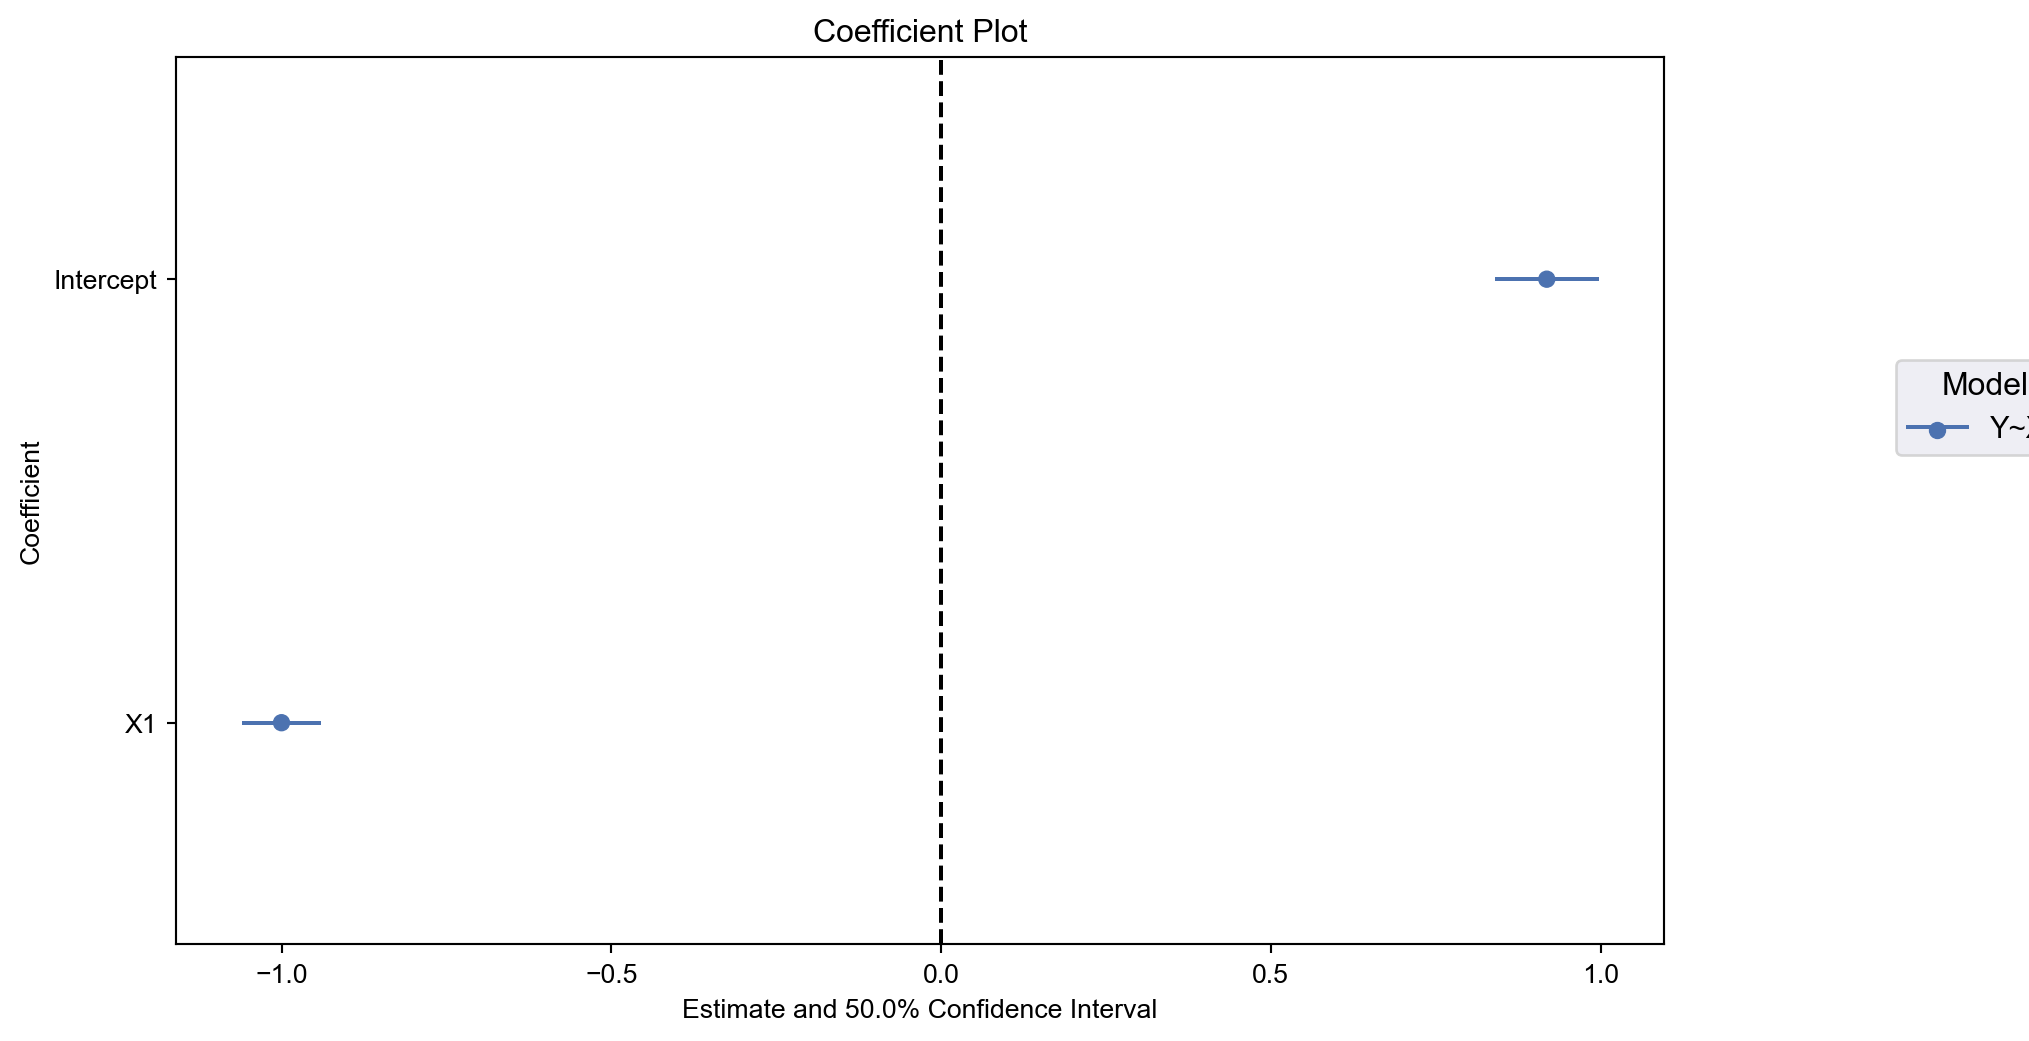

In [4]:
pf.coefplot(fit1, alpha = 0.5, plot_backend='matplotlib')